resources:

- setting up cdsapi for download: https://cds.climate.copernicus.eu/api-how-to
- info on temperature field: https://confluence.ecmwf.int/display/CKB/ERA5%3A+2+metre+temperature
- status on requests: https://cds.climate.copernicus.eu/cdsapp#!/yourrequests

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import cdsapi
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
data_path = Path("temperature_2m.nc")

if not data_path.exists():
    c = cdsapi.Client()
    c.retrieve(
        "reanalysis-era5-land",
        {
            "format": "netcdf",
            "variable": "2m_temperature",
            "year": [
                "2020",
                "2021",
            ],
            "day": [
                "01",
                "02",
                "03",
                "04",
                "05",
                "06",
                "07",
                "08",
                "09",
                "10",
                "11",
                "12",
                "13",
                "14",
                "15",
                "16",
                "17",
                "18",
                "19",
                "20",
                "21",
                "22",
                "23",
                "24",
                "25",
                "26",
                "27",
                "28",
                "29",
                "30",
                "31",
            ],
            "time": [
                "00:00",
                "01:00",
                "02:00",
                "03:00",
                "04:00",
                "05:00",
                "06:00",
                "07:00",
                "08:00",
                "09:00",
                "10:00",
                "11:00",
                "12:00",
                "13:00",
                "14:00",
                "15:00",
                "16:00",
                "17:00",
                "18:00",
                "19:00",
                "20:00",
                "21:00",
                "22:00",
                "23:00",
            ],
            "month": [
                "01",
                "02",
                "03",
                "04",
                "05",
                "06",
                "07",
                "08",
                "09",
                "10",
                "11",
                "12",
            ],
            "area": [
                60,
                -10,
                50,
                5,
            ],
        },
        str(data_path),
    )

_ = """
My original request took just over an hour to complete:

2022-04-07 10:15:33,770 INFO Welcome to the CDS
2022-04-07 10:15:33,771 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2022-04-07 10:15:33,863 INFO Request is queued
2022-04-07 10:37:56,342 INFO Request is running
2022-04-07 11:36:07,473 INFO Request is completed
"""

<IPython.core.display.Javascript object>

In [4]:
ds = xr.open_dataset("temperature_2m.nc")
ds_cambridge = ds.sel(longitude=0.07, method="nearest").sel(
    latitude=52.1, method="nearest"
)

<IPython.core.display.Javascript object>

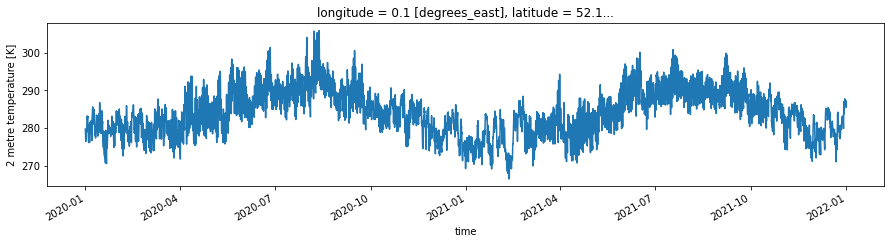

<IPython.core.display.Javascript object>

In [5]:
da_temp_2m_cambridge = ds_cambridge.t2m
da_temp_2m_cambridge.plot(size=3.0, aspect=5.0)

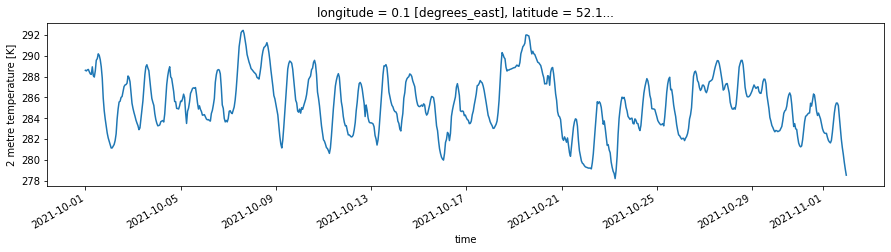

<IPython.core.display.Javascript object>

In [6]:
da_temp_2m_cambridge.sel(time=slice("2021-10-01", "2021-11-01")).plot(
    size=3.0, aspect=5.0
)

In [7]:
# plot temperature field near Cambridge on an map to get an idea of the resolution
# you'll need to install cartopy (with conda/mamba) to do this

<IPython.core.display.Javascript object>

In [8]:
import cartopy.crs as ccrs

<IPython.core.display.Javascript object>

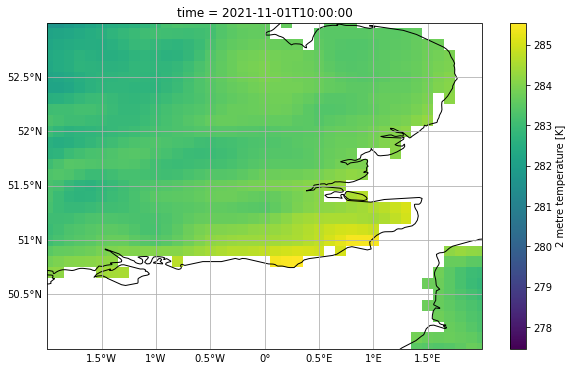

<IPython.core.display.Javascript object>

In [9]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(10, 6))

ax.set_extent([-2, 2, 50, 53])
ax.coastlines()
ax.gridlines(draw_labels=["left", "bottom"])

ds.sel(time="2021-11-01T10:00", method="nearest").t2m.plot(
    ax=ax, transform=ccrs.PlateCarree()
)